<a href="https://colab.research.google.com/github/datajoedata/e-Commerce-Sales-Analysis-Target-Brazil/blob/main/An%C3%A1lise_explorat%C3%B3ria_vendas_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de E-commerce (Target)

# I - Montagem do drive e carregamento dos dados:

In [4]:
!pip install contextily

In [5]:
from google.colab import drive
from zipfile import ZipFile
import os
import pandas as pd
from IPython.display import display
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np


In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Descompacta arquivos

zip_path = '/content/drive/MyDrive/Analise_de_Vendas_E-commerce/archive (2).zip'

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Lista arquivos descompactados
files = os.listdir('/content/')
print(files)


['.config', 'customers.csv', 'drive', 'orders.csv', 'products.csv', 'sellers.csv', 'payments.csv', 'geolocation.csv', 'order_items.csv', 'sample_data']


In [8]:
clientes_df = pd.read_csv('/content/customers.csv')
vendedores_df = pd.read_csv('/content/sellers.csv')
itens_pedidos_df = pd.read_csv('/content/order_items.csv')
geolocalizacao_df = pd.read_csv('/content/geolocation.csv')
pagamentos_df = pd.read_csv('/content/payments.csv')
pedidos_df = pd.read_csv('/content/orders.csv')
produtos_df = pd.read_csv('/content/products.csv')

# II - Limpeza dos dados

 Os seguintes passos foram empregados para cada DataFrame:
- **Passo 1:** Utilizar os métodos head() e tail() para visualizar as primeiras e últimas linhas.
- **Passo 2:** Verificar os tipos de dados usando df.info().
- **Passo 3:** Analisar os tipos de dados e converter conforme necessário.
- **Passo 4:** Tratar valores nulos (se existirem).
- **Passo 5:** Padronizar dados categóricos (e.g., transformar texto em minúsculas, remover espaços extras).

In [9]:
pd.set_option('display.max_rows', 5)

## 2.1 - Limpeza clientes

### 2.1.1 - Usando .head() e .tail()

head()

In [10]:
# Exibir as primeiras linhas de um DataFrame
def mostrar_head(df, nome_df):
    print(f'Primeiras linhas do DataFrame {nome_df}:')
    display(df.head())
    print('\n')

In [11]:
mostrar_head(clientes_df, 'clientes_df')

Primeiras linhas do DataFrame clientes_df:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


.tail()

In [12]:
clientes_df.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


### 2.1.2 - Usando .info()

In [13]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### 2.1.3 - Remoção de duplicatas


In [14]:
def remover_duplicatas(df, coluna):
    linhas_antes = len(df)

    df_sem_duplicatas = df.drop_duplicates(subset=coluna, keep='first')

    linhas_depois = len(df_sem_duplicatas)

    linhas_removidas = linhas_antes - linhas_depois
    print(f'\nTotal de linhas removidas com base na coluna "{coluna}": {linhas_removidas}')

    return df_sem_duplicatas

In [15]:
remover_duplicatas(clientes_df, 'customer_unique_id')


Total de linhas removidas com base na coluna "customer_unique_id": 3345


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
...,...,...,...,...,...
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


### 2.1.4 - Conversão Tipos de Dados

Converter a coluna 'customer_zip_code_prefix' para string


In [16]:
clientes_df['customer_zip_code_prefix'] = clientes_df['customer_zip_code_prefix'].astype(str)

Verifica alterações


In [17]:
print(clientes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None


### 2.1.5 - Padronização

Remover espaços em branco no início e no final para todas as colunas


In [18]:
clientes_df = clientes_df.apply(lambda x: x.str.strip())

## 2.2 - Limpeza vendedores

Usando .head() e .tail()

In [19]:
mostrar_head(vendedores_df, 'vendedores_df')

Primeiras linhas do DataFrame vendedores_df:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
vendedores_df.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


Usando .info

In [21]:
vendedores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Remoção de duplicatas pela coluna id

In [22]:
vendedores_df = remover_duplicatas(vendedores_df, 'seller_id')


Total de linhas removidas com base na coluna "seller_id": 0


Conversão tipo de dados

In [23]:
vendedores_df['seller_zip_code_prefix'] = vendedores_df['seller_zip_code_prefix'].astype(str)

Padronização

In [24]:
# Remove espaços no começo e no final das strings
clientes_df = clientes_df.apply(lambda x: x.str.strip())

## 2.3 - Limpeza itens_pedidos

In [25]:
mostrar_head(itens_pedidos_df, 'itens_pedidos_df')

Primeiras linhas do DataFrame itens_pedidos_df:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [26]:
itens_pedidos_df.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


Usando .info()

In [27]:
itens_pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Remoção de duplicatas

In [28]:
itens_pedidos_df = remover_duplicatas(itens_pedidos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 13984


Conversão Tipos de dados

Converter 'order_item_id' para string


In [29]:
print(itens_pedidos_df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [30]:
itens_pedidos_df['order_item_id'] = itens_pedidos_df['order_item_id'].astype(str)

Converter 'shipping_limit_date' para datetime


In [31]:
itens_pedidos_df['shipping_limit_date'] = pd.to_datetime(itens_pedidos_df['shipping_limit_date'], errors='coerce')

## 2.4 - Limpeza geolocalização

Usando .head() e .info()

In [32]:
mostrar_head(geolocalizacao_df, 'geolocalizacao_df')

Primeiras linhas do DataFrame geolocalizacao_df:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [33]:
geolocalizacao_df.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


Usando .info

In [34]:
geolocalizacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Conversão tipos de dados

In [35]:
# Converte 'geolocation_zip_code_prefix' para string
geolocalizacao_df['geolocation_zip_code_prefix'] = geolocalizacao_df['geolocation_zip_code_prefix'].astype(str)

Padronização

In [36]:
# Remover espaços no início e no final de todas as colunas do tipo string
geolocalizacao_df = geolocalizacao_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

## 2.5 - Limpeza pagamentos

Usando .head() e .tail()

In [37]:
mostrar_head(pagamentos_df, 'pagamentos_df')

Primeiras linhas do DataFrame pagamentos_df:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [38]:
pagamentos_df.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,UPI,1,191.58


Usando .info()

In [39]:
pagamentos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [40]:
pagamentos_df = remover_duplicatas(pagamentos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 4446


Padronização

In [41]:
pagamentos_df = pagamentos_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

pagamentos_df['payment_type'] = pagamentos_df['payment_type'].str.lower()

## 2.6 - Limpeza pedidos

Usando .head() e .tail()

In [42]:
mostrar_head(pedidos_df, 'pedidos_df')

Primeiras linhas do DataFrame pedidos_df:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [43]:
pedidos_df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


Usando .info()

In [44]:
pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Remoção de duplicatas

In [45]:
pedidos_df = remover_duplicatas(pedidos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 0


Conversão tipo de dados

In [46]:
# Converter colunas de data para o tipo datetime
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'], errors='coerce')
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')
pedidos_df['order_delivered_carrier_date'] = pd.to_datetime(pedidos_df['order_delivered_carrier_date'], errors='coerce')
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')

Padronização

In [47]:
pedidos_df = pedidos_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

## 2.7 - Limpeza produtos

Usando .head() e tail()

In [48]:
mostrar_head(produtos_df, 'produtos_df')

Primeiras linhas do DataFrame produtos_df:


,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [49]:
produtos_df.tail()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,bed table bath,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


Usando .info()

In [50]:
produtos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Remoção de duplicatas

In [51]:
produtos_df = remover_duplicatas(produtos_df, 'product_id')


Total de linhas removidas com base na coluna "product_id": 0


Padronização

In [52]:
produtos_df['product category'] = produtos_df['product category'].str.lower().str.strip()

# III - Panorama Geral das Entregas

## 3.1 - Primeira e ultima data de entrega

In [53]:
# Encontrar a primeira e a última data na amostra
primeira_data = pedidos_df['order_delivered_customer_date'].min()
ultima_data = pedidos_df['order_delivered_customer_date'].max()

print(f"A primeira data de entrega na amostra é: {primeira_data}")
print(f"A última data de entrega na amostra é: {ultima_data}")

A primeira data de entrega na amostra é: 2016-10-11 13:46:32
A última data de entrega na amostra é: 2018-10-17 13:22:46


## 3.2 - Pedidos por Mês e Taxa de Crescimento Entre Períodos



In [54]:
# Agrupar os pedidos por mês para contar o número de pedidos entregues
pedidos_por_mes = pedidos_df.groupby(pedidos_df['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Converter o período para uma data, para facilitar a visualização
pedidos_por_mes['order_delivered_customer_date'] = pedidos_por_mes['order_delivered_customer_date'].dt.to_timestamp()

# Identificar o pico de entregas (maior valor no período) e meses sem entregas (gaps)
pico_entrega = pedidos_por_mes['num_pedidos'].max()
gap_entrega = pedidos_por_mes[pedidos_por_mes['num_pedidos'] == 0].shape[0]

# Exibir a quantidade de pedidos por mês
for index, row in pedidos_por_mes.iterrows():
    print(f"Mês: {row['order_delivered_customer_date'].strftime('%Y-%m')}, Número de Pedidos: {row['num_pedidos']}")

# Exibir informações sobre picos e gaps
print(f"\nO maior pico de entregas em um mês foi de {pico_entrega} pedidos.")
print(f"Existem {gap_entrega} meses sem nenhuma entrega registrada.")

Mês: 2016-10, Número de Pedidos: 208
Mês: 2016-11, Número de Pedidos: 60
Mês: 2016-12, Número de Pedidos: 4
Mês: 2017-01, Número de Pedidos: 283
Mês: 2017-02, Número de Pedidos: 1351
Mês: 2017-03, Número de Pedidos: 2382
Mês: 2017-04, Número de Pedidos: 1849
Mês: 2017-05, Número de Pedidos: 3751
Mês: 2017-06, Número de Pedidos: 3223
Mês: 2017-07, Número de Pedidos: 3455
Mês: 2017-08, Número de Pedidos: 4302
Mês: 2017-09, Número de Pedidos: 3965
Mês: 2017-10, Número de Pedidos: 4494
Mês: 2017-11, Número de Pedidos: 4670
Mês: 2017-12, Número de Pedidos: 7205
Mês: 2018-01, Número de Pedidos: 6597
Mês: 2018-02, Número de Pedidos: 5850
Mês: 2018-03, Número de Pedidos: 6825
Mês: 2018-04, Número de Pedidos: 7850
Mês: 2018-05, Número de Pedidos: 7111
Mês: 2018-06, Número de Pedidos: 6829
Mês: 2018-07, Número de Pedidos: 5839
Mês: 2018-08, Número de Pedidos: 8314
Mês: 2018-09, Número de Pedidos: 56
Mês: 2018-10, Número de Pedidos: 3

O maior pico de entregas em um mês foi de 8314 pedidos.
Exist

### 3.2.1 - Tratando meses outliers
(Meses com menos de 300 pedidos)

In [62]:
# Certificar que a coluna 'order_delivered_customer_date' está no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')

# Calcular os meses válidos com base no número de pedidos (exemplo: meses com mais de 300 pedidos)
pedidos_por_mes = pedidos_df.groupby(pedidos_df['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Definir a regra para meses válidos (exemplo: meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_df' para conter apenas os meses válidos
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

### 3.2.2 - Número de pedidos entregues no primeiro e último período analisado e sua taxa de crescimento.


Taxa de crescimento entre o primeiro e penúltimo mês: 515.40%


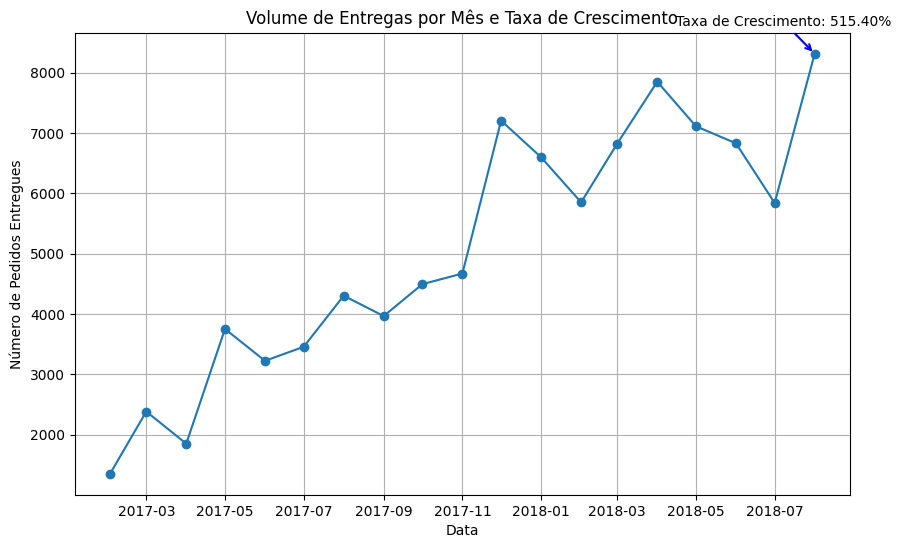

In [63]:
# Agrupar os pedidos por mês usando o DataFrame já filtrado
pedidos_por_mes_filtrado = pedidos_df_filtrado.groupby(pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Converter o período para uma data, para facilitar a visualização
pedidos_por_mes_filtrado['order_delivered_customer_date'] = pedidos_por_mes_filtrado['order_delivered_customer_date'].dt.to_timestamp()

# Calcular a taxa de crescimento das entregas entre a primeira e a última data
taxa_crescimento = (pedidos_por_mes_filtrado['num_pedidos'].iloc[-1] - pedidos_por_mes_filtrado['num_pedidos'].iloc[0]) / pedidos_por_mes_filtrado['num_pedidos'].iloc[0] * 100
print(f"Taxa de crescimento entre o primeiro e penúltimo mês: {taxa_crescimento:.2f}%")

# Criar o gráfico de linhas mostrando o número de pedidos entregues por mês
plt.figure(figsize=(10, 6))
plt.plot(pedidos_por_mes_filtrado['order_delivered_customer_date'], pedidos_por_mes_filtrado['num_pedidos'], marker='o')
plt.title('Volume de Entregas por Mês e Taxa de Crescimento')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos Entregues')
plt.grid(True)

# Adicionar a taxa de crescimento ao gráfico como anotação
plt.annotate(f'Taxa de Crescimento: {taxa_crescimento:.2f}%',
             xy=(pedidos_por_mes_filtrado['order_delivered_customer_date'].iloc[-1], pedidos_por_mes_filtrado['num_pedidos'].iloc[-1]),
             xytext=(-100, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', lw=1.5, color='blue'))

plt.show()


## 3.3 - Distribuição dos pedidos por tempo de entrega

### 3.3.1 - Calculando o tempo de entrega (dias entre a confirmação do pagamento e a entrega ao cliente)


### 3.3.2 - Tratando os outliers para calcular tempos de entrega (Removendo Q1 e Q3)

In [58]:
# Converter apenas as colunas necessárias para datetime
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'], errors='coerce')
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')

# Calcular o tempo de entrega (dias entre a confirmação do pagamento e a entrega ao cliente)
pedidos_df['tempo_entrega'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_approved_at']).dt.days

# Calcular o 1º e 3º quartil (Q1 e Q3) e o IQR (Intervalo interquartílico)
Q1 = pedidos_df['tempo_entrega'].quantile(0.25)
Q3 = pedidos_df['tempo_entrega'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers do DataFrame e criar uma cópia
pedidos_sem_outliers_entregas = pedidos_df[(pedidos_df['tempo_entrega'] >= limite_inferior) & (pedidos_df['tempo_entrega'] <= limite_superior)].copy()

# Exibir o número de outliers removidos
outliers = pedidos_df[(pedidos_df['tempo_entrega'] < limite_inferior) | (pedidos_df['tempo_entrega'] > limite_superior)]
print(f"Número de outliers encontrados e removidos: {len(outliers)}")

# Exibir alguns outliers como exemplo
display(outliers[['order_id', 'tempo_entrega']].head(3))

Número de outliers encontrados e removidos: 4773


,order_id,tempo_entrega
29,ecab90c9933c58908d3d6add7c6f5ae3,30.0
35,8563039e855156e48fccee4d611a3196,30.0
41,6ea2f835b4556291ffdc53fa0b3b95e8,33.0


### 3.3.3 - Tempo Médio de Aprovação e Transporte

In [59]:
# Agora que as colunas estão no formato datetime, calcular o tempo de aprovação e transporte
pedidos_sem_outliers_entregas['tempo_aprovacao'] = (pedidos_sem_outliers_entregas['order_approved_at'] - pedidos_sem_outliers_entregas['order_purchase_timestamp']).dt.days

# Calcular tempo de transporte (dias entre a aprovação do pagamento e a entrega)
pedidos_sem_outliers_entregas['tempo_transporte'] = (pedidos_sem_outliers_entregas['order_delivered_customer_date'] - pedidos_sem_outliers_entregas['order_approved_at']).dt.days

# Exibir a média, mediana e desvio padrão após remover os outliers
media_aprovacao = round(pedidos_sem_outliers_entregas['tempo_aprovacao'].mean(), 1)
media_transporte = round(pedidos_sem_outliers_entregas['tempo_transporte'].mean(), 1)

print(f"Média do tempo de aprovação (sem outliers): {media_aprovacao} dias")
print(f"Média do tempo de transporte (sem outliers): {media_transporte} dias")

Média do tempo de aprovação (sem outliers): 0.3 dias
Média do tempo de transporte (sem outliers): 10.2 dias


### 3.3.4 - Gráfico da distribuição de densidade do tempo de entrega por pedido

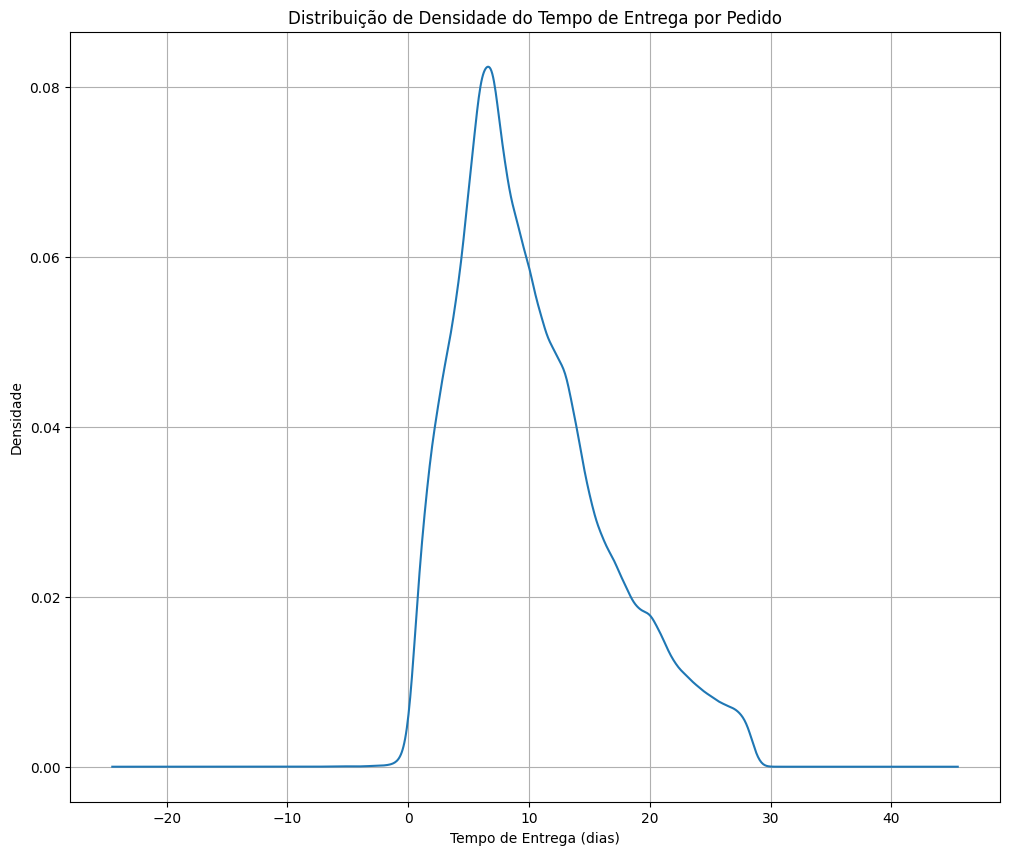

In [60]:
# Gráfico de densidade para visualizar a distribuição do tempo de entrega
plt.figure(figsize=(12, 10))
pedidos_sem_outliers_entregas['tempo_entrega'].plot(kind='kde')
plt.title('Distribuição de Densidade do Tempo de Entrega por Pedido')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

### 3.3.5 - Histograma da distribuição do tempo de entrega por pedidos

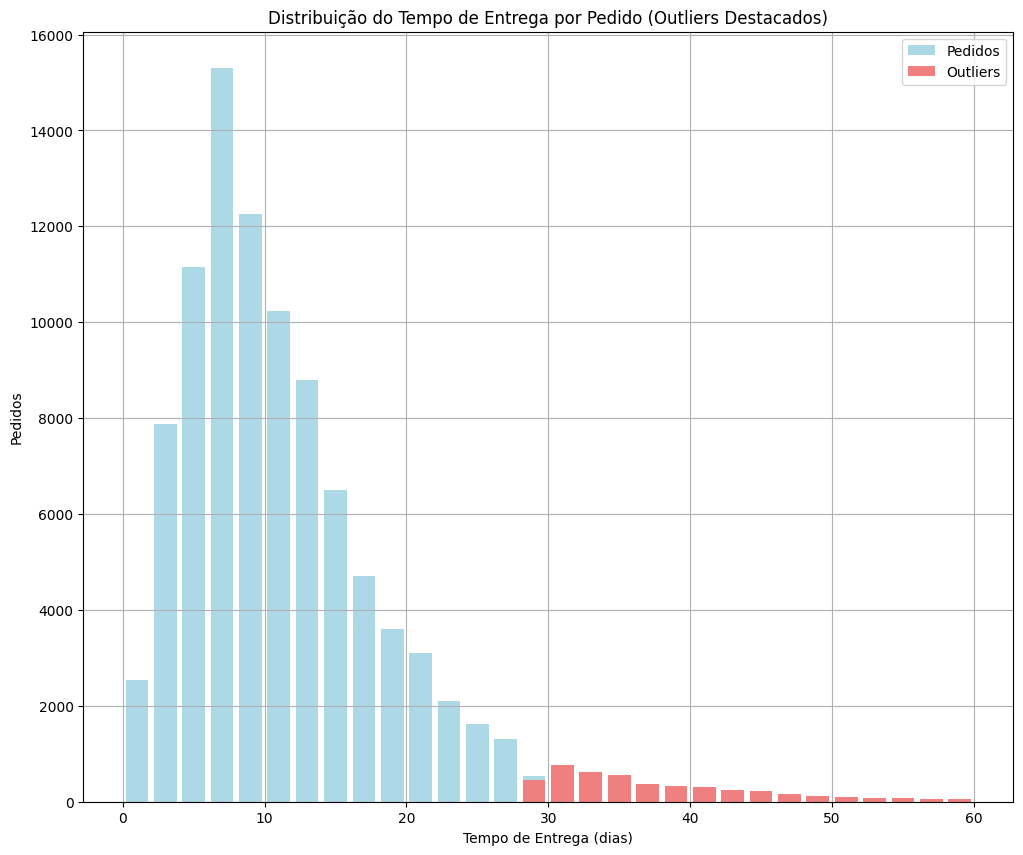

In [61]:
# Plota histograma com outliers
plt.figure(figsize=(12, 10))
plt.hist(pedidos_sem_outliers_entregas['tempo_entrega'], bins=30, range=(0, 60), rwidth=0.8, color='lightblue', label='Pedidos')
plt.hist(outliers['tempo_entrega'], bins=30, range=(0, 60), rwidth=0.8, color='lightcoral', label='Outliers')

plt.title('Distribuição do Tempo de Entrega por Pedido (Outliers Destacados)')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Pedidos')
plt.legend()
plt.grid(True)
plt.show()

# IV - Cobertura Geográfica das Entregas

## 4.1 - Pedidos por Estado

In [64]:
if 'customer_state' not in pedidos_df.columns:
    pedidos_df = pedidos_df.merge(clientes_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# Contar o número de pedidos por estado no DataFrame filtrado
pedidos_por_estado = pedidos_df.groupby('customer_state')['order_id'].count().reset_index(name='num_pedidos')

# Exibir os primeiros resultados
display(pedidos_por_estado.head(3))

,customer_state,num_pedidos
0,AC,81
1,AL,413
2,AM,148


### 4.1.1 - Gráfico de barras pedidos por Estado

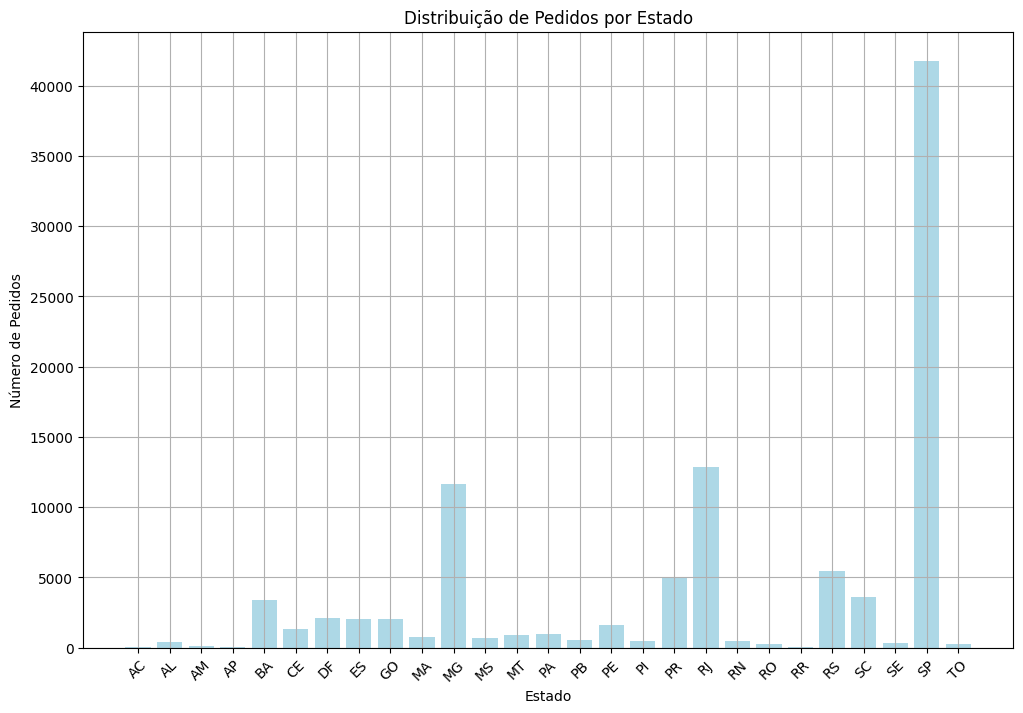

In [65]:
# Plotar o gráfico de barras mostrando o número de pedidos por estado
plt.figure(figsize=(12, 8))
plt.bar(pedidos_por_estado['customer_state'], pedidos_por_estado['num_pedidos'], color='lightblue')
plt.title('Distribuição de Pedidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 4.2 - Ticket Médio por Estado


In [66]:
# Fazer o merge entre pedidos_df e itens_pedidos_df para trazer a coluna 'price'
pedidos_com_valor = pedidos_df.merge(itens_pedidos_df[['order_id', 'price']], on='order_id', how='left')

# Calcular o valor médio dos pedidos por estado
valor_medio_pedidos_estado = pedidos_com_valor.groupby('customer_state')['price'].mean().reset_index(name='valor_medio_pedido')

### 4.2.1 - Gráfico de barras mostrando o Ticket Médio por estado

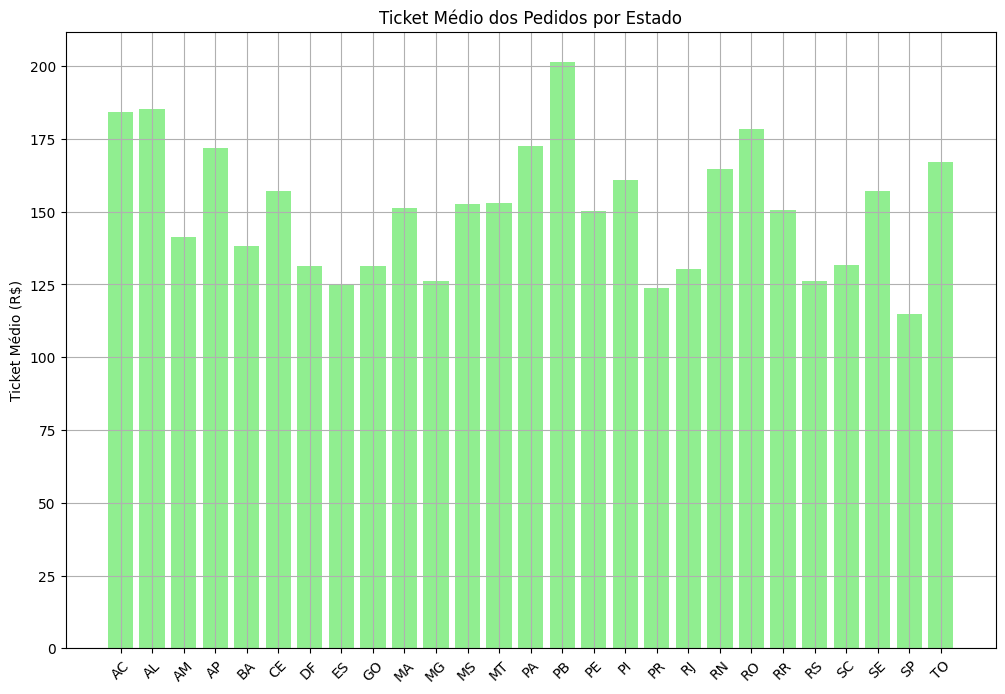

In [67]:
# Plotar o gráfico de barras mostrando o valor médio dos pedidos por estado (ticket médio)
plt.figure(figsize=(12, 8))
plt.bar(valor_medio_pedidos_estado['customer_state'], valor_medio_pedidos_estado['valor_medio_pedido'], color='lightgreen')

# Adicionar título e rótulos
plt.title('Ticket Médio dos Pedidos por Estado')
plt.ylabel('Ticket Médio (R$)')
plt.xticks(rotation=45)  # Girar os rótulos dos estados para melhor legibilidade
plt.grid(True)

# Exibir o gráfico
plt.show()

## 4.3 - Média de Tempo de Entrega por UF

In [68]:
# Garantir que 'customer_state' esteja presente no DataFrame filtrado
if 'customer_state' not in pedidos_sem_outliers_entregas.columns:
    pedidos_sem_outliers_entregas = pedidos_sem_outliers_entregas.merge(clientes_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# Calcular a média e o desvio padrão do tempo de entrega por estado
tempo_entrega_por_estado = pedidos_sem_outliers_entregas.groupby('customer_state')['tempo_entrega'].agg(['mean', 'std']).reset_index()
tempo_entrega_por_estado.columns = ['customer_state', 'media_tempo_entrega', 'desvio_padrao_tempo_entrega']

# Exibir os primeiros resultados
display(tempo_entrega_por_estado.head(3))

,customer_state,media_tempo_entrega,desvio_padrao_tempo_entrega
0,AC,16.885714,5.060626
1,AL,17.717314,5.660422
2,AM,19.136842,7.136377


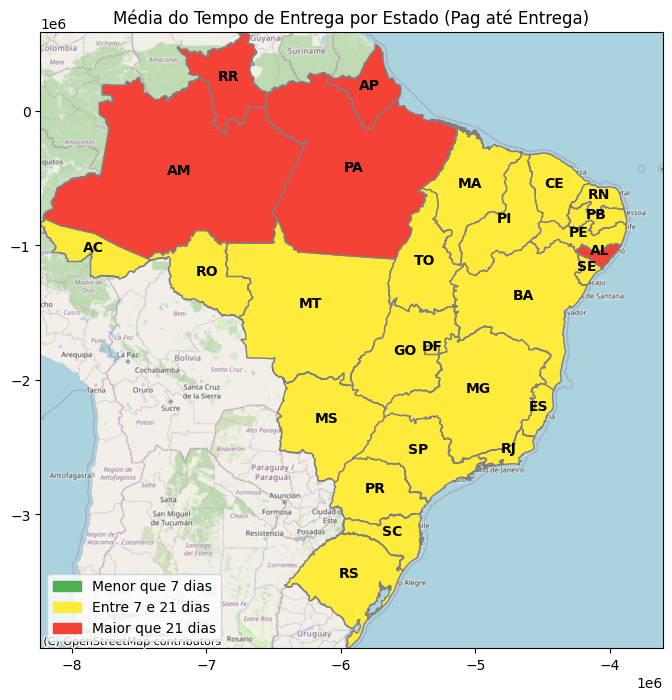

In [69]:
# Carregar o shapefile dos estados do Brasil (GeoJSON)
brasil = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")


# Agrupar por estado e calcular a média do tempo de entrega por estado
media_tempo_entrega_por_estado = pedidos_df.groupby('customer_state')['tempo_entrega'].mean().reset_index()

# Unir os dados de tempo de entrega ao GeoDataFrame 'brasil'
brasil = brasil.merge(media_tempo_entrega_por_estado, left_on='sigla', right_on='customer_state', how='left')

# Função para definir a cor dos estados com base no tempo médio de entrega
def definir_cor(tempo_entrega):
    if pd.isna(tempo_entrega):
        return '#f5f5dc'  # Bege para estados sem dados
    elif tempo_entrega <= 7:
        return '#4caf50'  # Verde para entregas rápidas (até 7 dias)
    elif 7 < tempo_entrega <= 21:
        return '#ffeb3b'  # Amarelo para 7 a 21 dias
    else:
        return '#f44336'  # Vermelho para mais de 21 dias

# Aplicar a função para determinar a cor de cada estado
brasil['cor'] = brasil['tempo_entrega'].apply(definir_cor)

# Converter o shapefile para o sistema de coordenadas adequado
brasil = brasil.to_crs(epsg=3857)

# Definir os limites do mapa
bounds = brasil.total_bounds

# Plotar o mapa com as cores definidas
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
brasil.plot(ax=ax, color=brasil['cor'], edgecolor='gray')

# Adicionar o fundo de mapa
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)

# Limitar o mapa ao Brasil
ax.set_xlim([bounds[0], bounds[2]])
ax.set_ylim([bounds[1], bounds[3]])

# Adicionar os nomes dos estados no centro de cada estado
for idx, row in brasil.iterrows():
    estado_geom = row['geometry'].centroid
    ax.text(estado_geom.x, estado_geom.y, row['sigla'], horizontalalignment='center', fontsize=10, fontweight='bold', color='black')

# Criar a legenda
import matplotlib.patches as mpatches
legenda = [
    mpatches.Patch(color='#4caf50', label='Menor que 7 dias'),
    mpatches.Patch(color='#ffeb3b', label='Entre 7 e 21 dias'),
    mpatches.Patch(color='#f44336', label='Maior que 21 dias')
]
ax.legend(handles=legenda, loc='lower left')

# Definir título e mostrar o mapa
plt.title('Média do Tempo de Entrega por Estado (Pag até Entrega)', fontsize=12)
plt.show()


### 4.4 - Distribuição de Atrasos por Estado vs. Qtde pedidos por Estado

Definimos um pedido como "atrasado" quando o tempo de entrega ultrapassa a data estimada



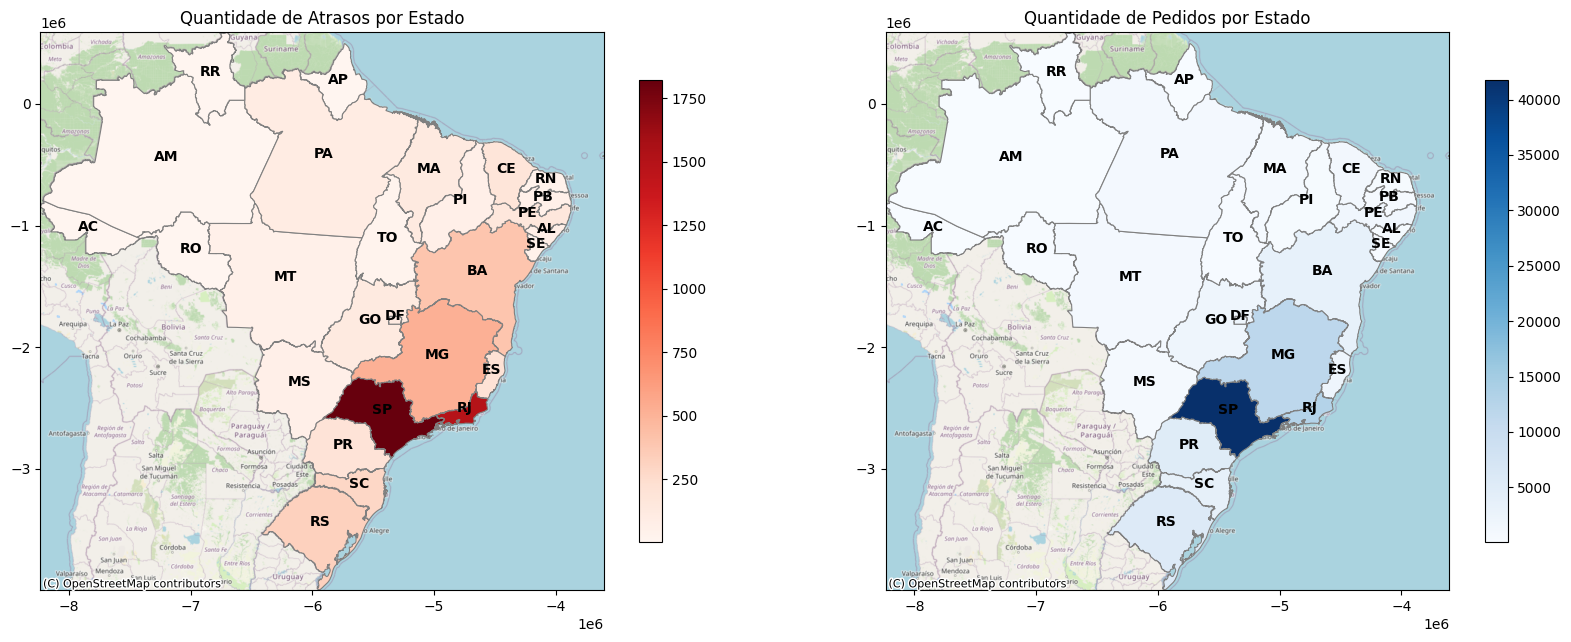

In [70]:
# Certificar que as colunas de data estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')

# Criar a coluna 'atraso_vs_estimativa' para calcular a diferença entre a data real e estimada
pedidos_df['atraso_vs_estimativa'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_estimated_delivery_date']).dt.days

# Filtrar os pedidos que tiveram atraso
pedidos_atrasados = pedidos_df[pedidos_df['atraso_vs_estimativa'] > 0]

# Agrupar o número de atrasos por estado
atrasos_por_estado = pedidos_atrasados.groupby('customer_state')['tempo_entrega'].count().reset_index()
atrasos_por_estado.columns = ['sigla', 'Quantidade de Atrasos']

# Agrupar o número de pedidos por estado
pedidos_por_estado = pedidos_df.groupby('customer_state')['order_id'].count().reset_index()
pedidos_por_estado.columns = ['sigla', 'Quantidade de Pedidos']

# Carregar o shapefile dos estados do Brasil (GeoJSON)
brasil = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

# Merge dos dados de atrasos e pedidos no GeoDataFrame
brasil = brasil.merge(atrasos_por_estado, on='sigla', how='left')
brasil = brasil.merge(pedidos_por_estado, on='sigla', how='left')

# Preencher valores NaN com 0 (para estados sem dados)
brasil['Quantidade de Atrasos'] = brasil['Quantidade de Atrasos'].fillna(0)
brasil['Quantidade de Pedidos'] = brasil['Quantidade de Pedidos'].fillna(0)

# Converter o shapefile para o sistema de coordenadas adequado
brasil = brasil.to_crs(epsg=3857)

# Definir os limites do mapa
bounds = brasil.total_bounds

# Criar subplots para os dois gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# Plotar o mapa de atrasos
brasil.plot(column='Quantidade de Atrasos', ax=ax1, legend=True, cmap='Reds', edgecolor='gray', linewidth=0.8,
            legend_kwds={'shrink': 0.5})
ax1.set_xlim([bounds[0], bounds[2]])
ax1.set_ylim([bounds[1], bounds[3]])
ax1.set_title('Quantidade de Atrasos por Estado', fontsize=12)

# Adicionar os nomes dos estados no centro de cada estado
for idx, row in brasil.iterrows():
    if row['Quantidade de Atrasos'] > 0:
        estado_geom = row['geometry'].centroid
        ax1.text(estado_geom.x, estado_geom.y, row['sigla'], horizontalalignment='center', fontsize=10, fontweight='bold')

# Plotar o mapa de pedidos
brasil.plot(column='Quantidade de Pedidos', ax=ax2, legend=True, cmap='Blues', edgecolor='gray', linewidth=0.8,
            legend_kwds={'shrink': 0.5})
ax2.set_xlim([bounds[0], bounds[2]])
ax2.set_ylim([bounds[1], bounds[3]])
ax2.set_title('Quantidade de Pedidos por Estado', fontsize=12)

# Adicionar os nomes dos estados no centro de cada estado
for idx, row in brasil.iterrows():
    if row['Quantidade de Pedidos'] > 0:
        estado_geom = row['geometry'].centroid
        ax2.text(estado_geom.x, estado_geom.y, row['sigla'], horizontalalignment='center', fontsize=10, fontweight='bold')

# Adicionar o fundo de mapa (background) nos dois gráficos
ctx.add_basemap(ax1, crs=brasil.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)
ctx.add_basemap(ax2, crs=brasil.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)

# Exibir os gráficos
plt.show()



# V - Sasonalidade das Entregas

### 5.1 - Variação mensal da média, mediana e desvio padrão do tempo de entrega

<ipython-input-80-e286698d9850>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')


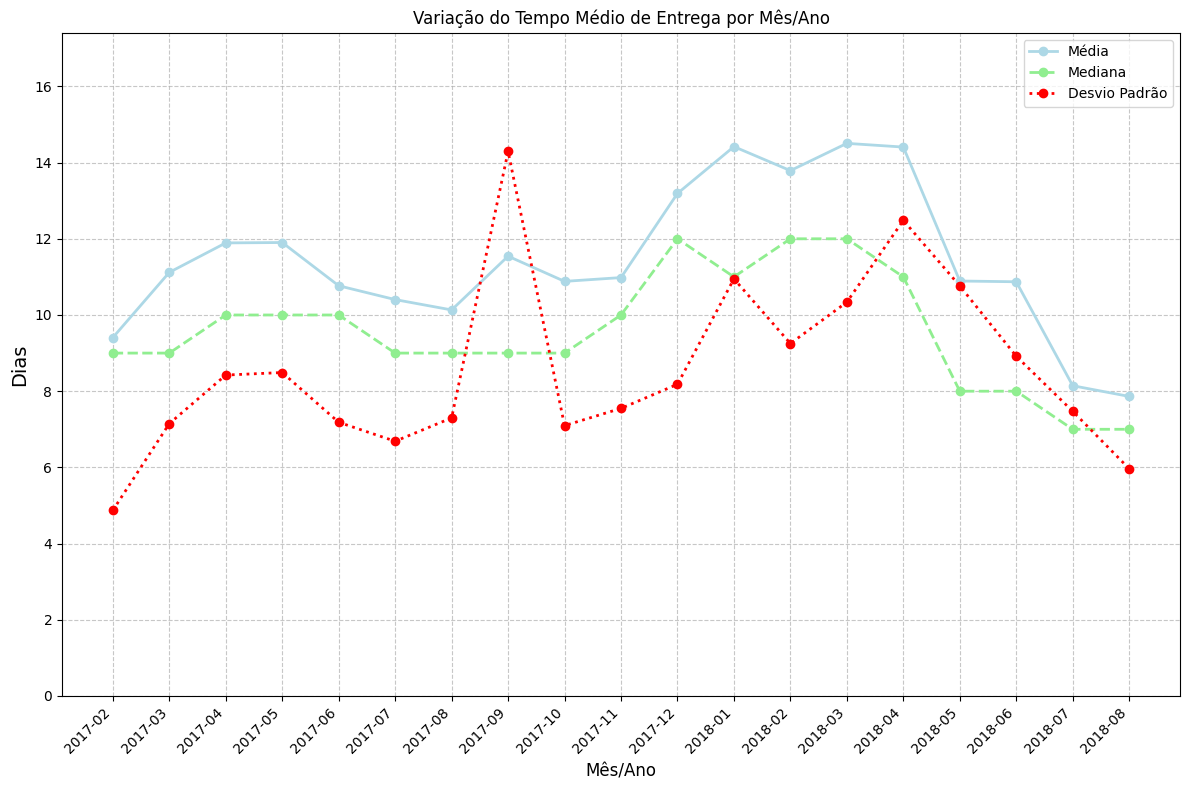

In [80]:
# Certificar que a coluna de datas está no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')

# Definir a regra para meses válidos (exemplo: meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_df' para conter apenas os meses válidos
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Criar a coluna 'ano_mes' após a filtragem
pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')

# Agrupa por 'ano_mes' e calcula as estatísticas
estatisticas_por_mes = pedidos_df_filtrado.groupby('ano_mes')['tempo_entrega'].agg(['mean', 'median', 'std']).reset_index()

# Renomear colunas
estatisticas_por_mes.columns = ['Mês/Ano', 'Média (dias)', 'Mediana (dias)', 'Desvio Padrão (dias)']

# Configurar tamanho e estilo do gráfico
plt.figure(figsize=(12, 8))

# Plotar (Média, Mediana e Desvio Padrão) com ajustes de estilo
plt.plot(estatisticas_por_mes['Mês/Ano'].astype(str), estatisticas_por_mes['Média (dias)'],
         label='Média', marker='o', color='lightblue', linewidth=2)
plt.plot(estatisticas_por_mes['Mês/Ano'].astype(str), estatisticas_por_mes['Mediana (dias)'],
         label='Mediana', marker='o', color='lightgreen', linestyle='--', linewidth=2)
plt.plot(estatisticas_por_mes['Mês/Ano'].astype(str), estatisticas_por_mes['Desvio Padrão (dias)'],
         label='Desvio Padrão', marker='o', color='red', linestyle=':', linewidth=2)

# Adicionar título, eixos e ajustar as legendas
plt.title('Variação do Tempo Médio de Entrega por Mês/Ano', fontsize=12)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Dias', fontsize=14)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Melhorar a legenda e ajustar o layout
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar os limites de visualização (opcional)
plt.ylim(0, estatisticas_por_mes['Média (dias)'].max() * 1.2)

plt.tight_layout()
plt.show()


### 5.2 - Variação Mensal da quantidade de Pedidos Atrasados.

<ipython-input-81-b16e92a69399>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')
<ipython-input-81-b16e92a69399>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')


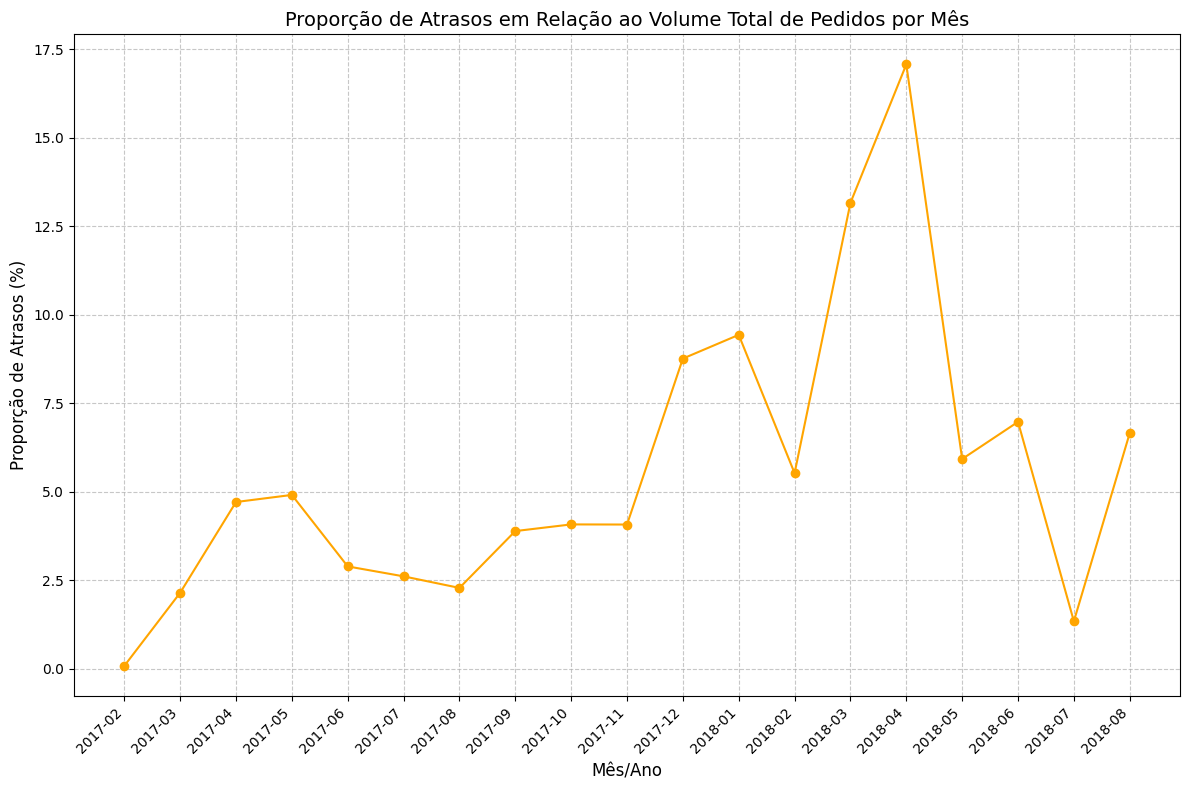

In [81]:
# Certificar que as colunas de datas estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')

# Agrupar os pedidos por mês e contar o número de pedidos entregues
pedidos_por_mes = pedidos_df.groupby(pedidos_df['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Definir a regra para meses válidos (exemplo: meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_df' para conter apenas os meses válidos
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Calcular o volume de pedidos por mês no DataFrame filtrado
pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')
volume_pedidos_por_mes = pedidos_df_filtrado.groupby('ano_mes')['order_id'].count().reset_index()
volume_pedidos_por_mes.columns = ['Mês/Ano', 'Volume Total de Pedidos']

# Calcular a quantidade de atrasos por mês no DataFrame filtrado
pedidos_atrasados_filtrado = pedidos_df_filtrado[pedidos_df_filtrado['atraso_vs_estimativa'] > 0]
pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')
atrasos_por_mes = pedidos_atrasados_filtrado.groupby('ano_mes')['order_id'].count().reset_index()
atrasos_por_mes.columns = ['Mês/Ano', 'Quantidade de Atrasos']

# Juntar os dois DataFrames (volume de pedidos e quantidade de atrasos)
analise_atrasos_por_mes = pd.merge(volume_pedidos_por_mes, atrasos_por_mes, on='Mês/Ano', how='left')
analise_atrasos_por_mes['Quantidade de Atrasos'] = analise_atrasos_por_mes['Quantidade de Atrasos'].fillna(0)

# Calcular a proporção de atrasos
analise_atrasos_por_mes['Proporção de Atrasos'] = analise_atrasos_por_mes['Quantidade de Atrasos'] / analise_atrasos_por_mes['Volume Total de Pedidos'] * 100

# Plotar o gráfico de proporção de atrasos por mês
plt.figure(figsize=(12, 8))
plt.plot(analise_atrasos_por_mes['Mês/Ano'].astype(str), analise_atrasos_por_mes['Proporção de Atrasos'], marker='o', color='orange')

# Adicionar título e rótulos dos eixos
plt.title('Proporção de Atrasos em Relação ao Volume Total de Pedidos por Mês', fontsize=14)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Proporção de Atrasos (%)', fontsize=12)

# Rotacionar os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar grade
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()


<ipython-input-82-4d86a0ad018f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')


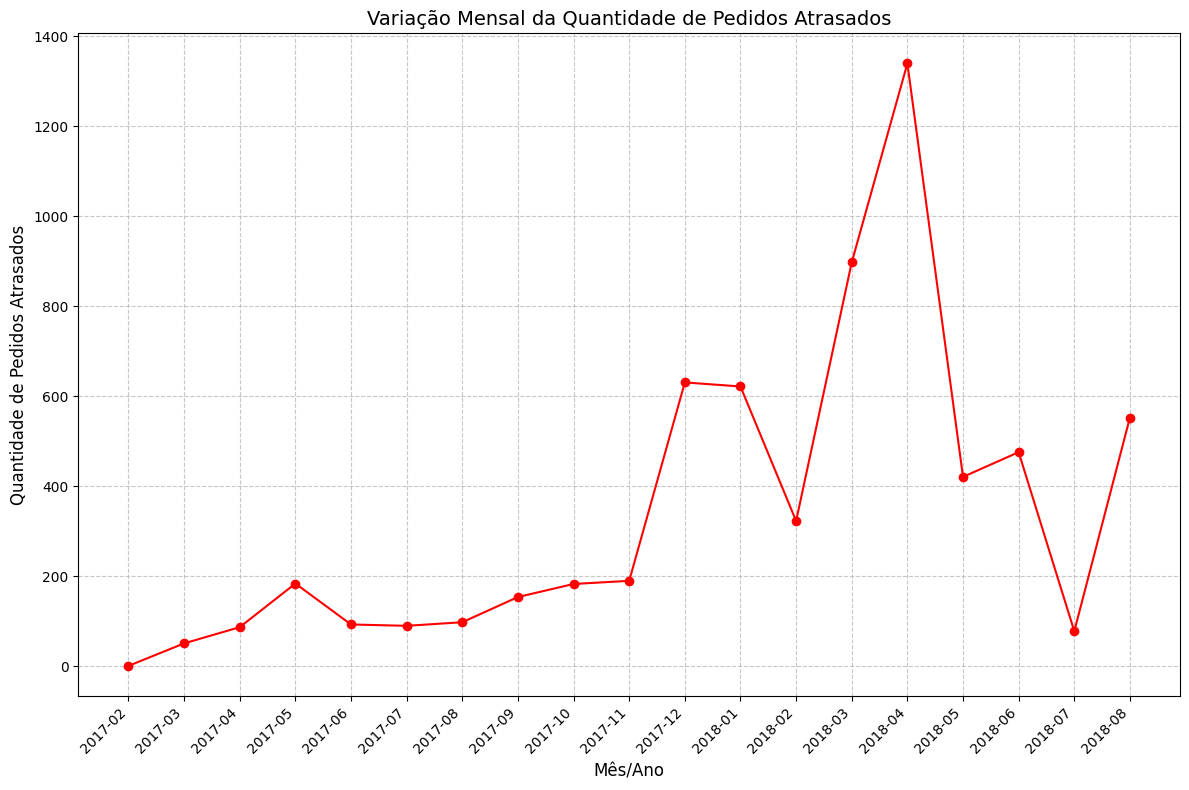

In [82]:
# Certificar que as colunas de datas estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')

# Definir a regra para meses válidos (meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_atrasados' para conter apenas os meses válidos
pedidos_atrasados_filtrado = pedidos_atrasados[pedidos_atrasados['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Gráfico de variação mensal da quantidade de pedidos atrasados com filtro aplicado
def plot_variacao_mensal_atrasos():
    # Criar uma nova coluna com o mês/ano de entrega no DataFrame filtrado
    pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')

    # Agrupar por mês/ano e contar a quantidade de pedidos atrasados no DataFrame filtrado
    atrasos_por_mes = pedidos_atrasados_filtrado.groupby('ano_mes')['order_id'].count().reset_index()
    atrasos_por_mes.columns = ['Mês/Ano', 'Quantidade de Atrasos']

    # Plotar o gráfico de linha da quantidade de atrasos por mês
    plt.figure(figsize=(12, 8))
    plt.plot(atrasos_por_mes['Mês/Ano'].astype(str), atrasos_por_mes['Quantidade de Atrasos'], marker='o', color='red')

    # Adicionar título e rótulos dos eixos
    plt.title('Variação Mensal da Quantidade de Pedidos Atrasados', fontsize=14)
    plt.xlabel('Mês/Ano', fontsize=12)
    plt.ylabel('Quantidade de Pedidos Atrasados', fontsize=12)

    # Rotacionar os rótulos do eixo X para melhor legibilidade
    plt.xticks(rotation=45, ha='right')

    # Adicionar grade
    plt.grid(True, linestyle='--', alpha=0.7)

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para exibir o gráfico
plot_variacao_mensal_atrasos()


## 5.3 - Correlação entre Volume de Pedidos e Tempo Médio de Entrega:

Correlação entre volume de pedidos e tempo médio de entrega: 0.25


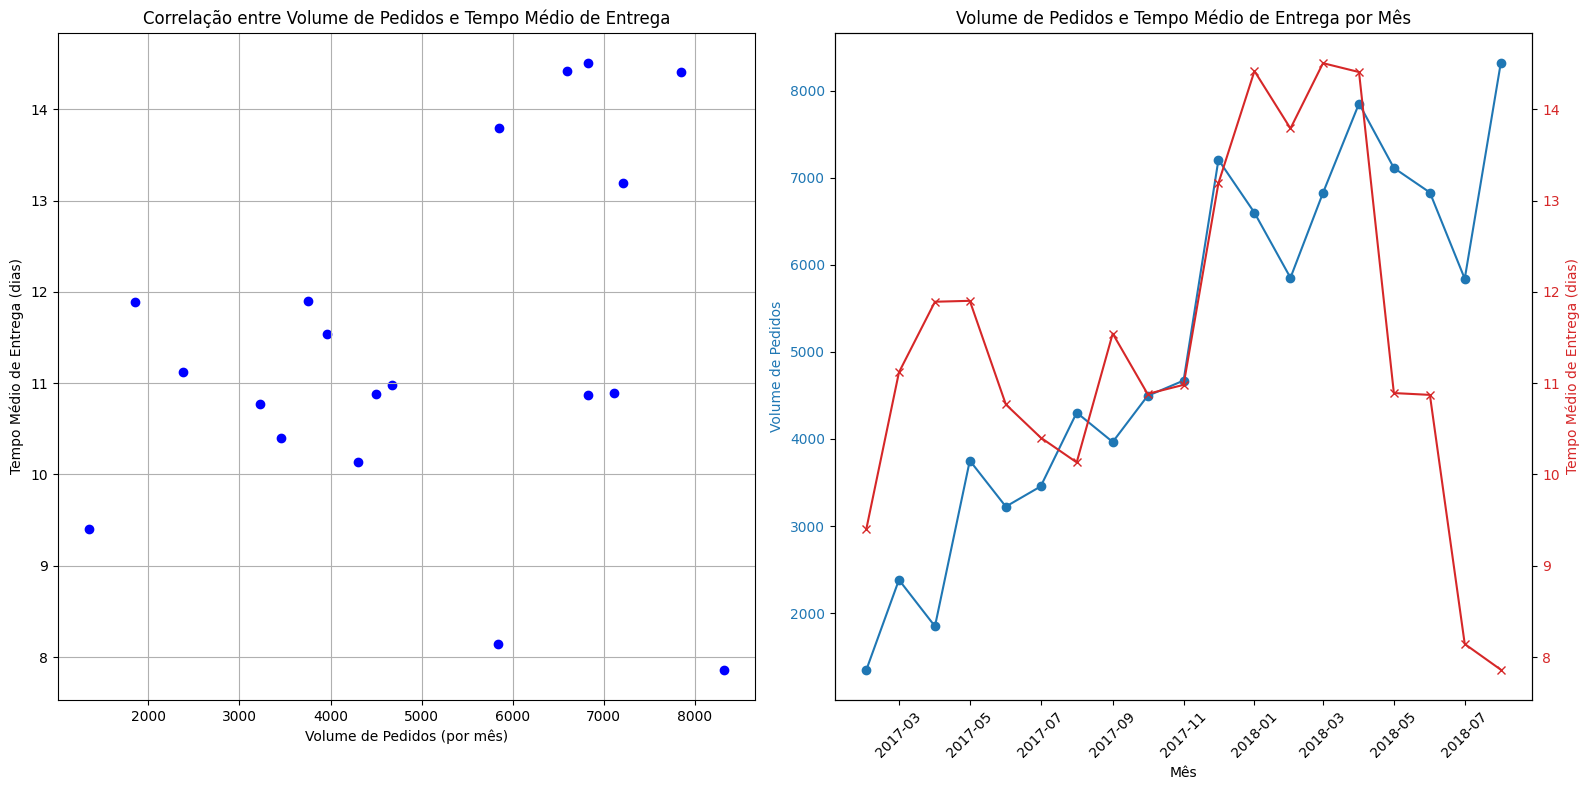

In [84]:
# Certificar que as colunas de datas estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')

# Calcular o tempo de entrega (dias entre aprovação e entrega)
pedidos_df['tempo_entrega'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_approved_at']).dt.days

# Filtrar os meses válidos (se já tiver sido feito, esta etapa pode ser ignorada)
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Calcular o volume de pedidos e o tempo médio de entrega por mês
volume_pedidos_por_mes = pedidos_df_filtrado.groupby(pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')
tempo_medio_por_mes = pedidos_df_filtrado.groupby(pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M'))['tempo_entrega'].mean().reset_index(name='tempo_medio_entrega')

# Juntar os dois DataFrames (volume de pedidos e tempo médio de entrega) para fazer a correlação
analise_por_mes = pd.merge(volume_pedidos_por_mes, tempo_medio_por_mes, on='order_delivered_customer_date')

# Calcular a correlação entre volume de pedidos e tempo médio de entrega
correlacao = analise_por_mes['num_pedidos'].corr(analise_por_mes['tempo_medio_entrega'])
print(f"Correlação entre volume de pedidos e tempo médio de entrega: {correlacao:.2f}")

# Converter a coluna 'order_delivered_customer_date' para datetime para facilitar a visualização no gráfico
analise_por_mes['order_delivered_customer_date'] = analise_por_mes['order_delivered_customer_date'].dt.to_timestamp()

# Criar a figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Primeiro gráfico: Dispersão (Correlação entre Volume e Tempo Médio de Entrega)
ax1.scatter(analise_por_mes['num_pedidos'], analise_por_mes['tempo_medio_entrega'], color='blue')
ax1.set_title('Correlação entre Volume de Pedidos e Tempo Médio de Entrega')
ax1.set_xlabel('Volume de Pedidos (por mês)')
ax1.set_ylabel('Tempo Médio de Entrega (dias)')
ax1.grid(True)

# Segundo gráfico: Linhas (Volume de Pedidos e Tempo Médio de Entrega)
color = 'tab:blue'
ax2.set_xlabel('Mês')
ax2.set_ylabel('Volume de Pedidos', color=color)
ax2.plot(analise_por_mes['order_delivered_customer_date'], analise_por_mes['num_pedidos'], color=color, marker='o', label='Volume de Pedidos')
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

ax3 = ax2.twinx()  # Criar um segundo eixo y que compartilha o mesmo eixo x
color = 'tab:red'
ax3.set_ylabel('Tempo Médio de Entrega (dias)', color=color)
ax3.plot(analise_por_mes['order_delivered_customer_date'], analise_por_mes['tempo_medio_entrega'], color=color, marker='x', label='Tempo Médio de Entrega')
ax3.tick_params(axis='y', labelcolor=color)

ax2.set_title('Volume de Pedidos e Tempo Médio de Entrega por Mês')

# Ajustar o layout
plt.tight_layout()
plt.show()


# VI - Análise de pedidos por cliente

### 6.1 - Separando clientes em 4 grupos distintos

- novos_clientes: (1 compra):

- clientes_reincidentes_1 (2 compras):

- clientes_reincidentes_2 (3 a 5 compras):

- clientes_reincidentes_3 (5+ compras):

In [ ]:
# Inner join entre 'pedidos_df' e 'clientes_df' utilizando 'customer_unique_id'
pedidos_clientes_df = pd.merge(pedidos_df[['order_id', 'customer_id']], clientes_df[['customer_id', 'customer_unique_id']], on='customer_id', how='inner')

# Agora utilizamos o 'customer_unique_id' para os próximos merges e análises com 'itens_pedidos_df'
pedidos_completos_df = pd.merge(pedidos_clientes_df[['order_id', 'customer_unique_id']], itens_pedidos_df[['order_id']], on='order_id', how='inner')

# Agora faremos um join com a tabela de pagamentos 'pagamentos_df' para trazer o valor do pagamento
pedidos_completos_com_pagamento = pd.merge(pedidos_completos_df, pagamentos_df[['order_id', 'payment_value']], on='order_id', how='inner')

# Contar a quantidade de pedidos por customer_unique_id e somar o valor total de pagamento por cliente
qtde_pedidos_por_cliente = pedidos_completos_com_pagamento.groupby('customer_unique_id').agg(
    qtde_pedidos=('order_id', 'count'),
    total_pagamento=('payment_value', 'sum')
).reset_index()

# Ordenar o resultado de forma descendente pela quantidade de pedidos
qtde_pedidos_por_cliente = qtde_pedidos_por_cliente.sort_values(by='qtde_pedidos', ascending=False)

# Exibir as primeiras 10 linhas
print(qtde_pedidos_por_cliente.head(10))


                     customer_unique_id  qtde_pedidos  total_pagamento
52596  8d50f5eadf50201ccdcedfb9e2ac8455            16           902.04
23302  3e43e6105506432c953e165fb2acf44c             9          1172.66
...                                 ...           ...              ...
37320  63cfc61cee11cbe306bff5857d00bfe4             6           826.32
26849  47c1a3033b8b77b3ab6e109eb4d5fdf3             6           944.21

[10 rows x 3 columns]


### 6.2 - Quantidade de pedidos por cliente e receita

- Reincidentes
- Não Reicindentes

In [ ]:
# Filtrar clientes com mais de 1 pedido (reincidentes)
clientes_reincidentes = qtde_pedidos_por_cliente[qtde_pedidos_por_cliente['qtde_pedidos'] > 1]
qtde_clientes_reincidentes = clientes_reincidentes['customer_unique_id'].nunique()

# Filtrar clientes com exatamente 1 pedido
clientes_1_pedido = qtde_pedidos_por_cliente[qtde_pedidos_por_cliente['qtde_pedidos'] == 1]
qtde_clientes_1_pedido = clientes_1_pedido['customer_unique_id'].nunique()

# Somar o valor total de pagamento para os clientes reincidentes
total_pagamento_reincidentes = clientes_reincidentes['total_pagamento'].sum()

# Somar o valor total de pagamento para os clientes com 1 pedido
total_pagamento_1_pedido = clientes_1_pedido['total_pagamento'].sum()

# Exibir os resultados
print(f"Quantidade de clientes reincidentes: {qtde_clientes_reincidentes}")
print(f"Quantidade de clientes com 1 pedido: {qtde_clientes_1_pedido}")
print(f"Valor total de pagamentos de clientes reincidentes: R$ {total_pagamento_reincidentes}")
print(f"Valor total de pagamentos de clientes com 1 pedido: R$ {total_pagamento_1_pedido}")


Quantidade de clientes reincidentes: 2913
Quantidade de clientes com 1 pedido: 92506
Valor total de pagamentos de clientes reincidentes: R$ 888885.83
Valor total de pagamentos de clientes com 1 pedido: R$ 14696230.809999999


### 6.3 - Distribuição dos clientes em cada grupo

In [ ]:
novos_clientes = qtde_pedidos_por_cliente[qtde_pedidos_por_cliente['qtde_pedidos'] == 1]
clientes_reincidentes_1 = qtde_pedidos_por_cliente[qtde_pedidos_por_cliente['qtde_pedidos'] == 2]
clientes_reincidentes_2 = qtde_pedidos_por_cliente[(qtde_pedidos_por_cliente['qtde_pedidos'] >= 3) & (qtde_pedidos_por_cliente['qtde_pedidos'] <= 5)]
clientes_reincidentes_3 = qtde_pedidos_por_cliente[qtde_pedidos_por_cliente['qtde_pedidos'] > 5]

qtde_novos_clientes = novos_clientes['customer_unique_id'].nunique()
qtde_clientes_reincidentes_1 = clientes_reincidentes_1['customer_unique_id'].nunique()
qtde_clientes_reincidentes_2 = clientes_reincidentes_2['customer_unique_id'].nunique()
qtde_clientes_reincidentes_3 = clientes_reincidentes_3['customer_unique_id'].nunique()


# Exibe os resultados
print(f"Novos clientes (1 compra): {qtde_novos_clientes}")
print(f"Clientes Reincidentes 1 (2 compras): {qtde_clientes_reincidentes_1}")
print(f"Clientes Reincidentes 2 (3 a 5 compras): {qtde_clientes_reincidentes_2}")
print(f"Clientes Reincidentes 3 (5+ compras): {qtde_clientes_reincidentes_3}")


Novos clientes (1 compra): 92506
Clientes Reincidentes 1 (2 compras): 2673
Clientes Reincidentes 2 (3 a 5 compras): 230
Clientes Reincidentes 3 (5+ compras): 10


### 6.4 -   Tempo de Entrega e Análise de Atrasos por Grupo de Clientes

In [ ]:
# Primeiro, calcular o tempo de entrega e o atraso
pedidos_df['tempo_entrega'] = (pd.to_datetime(pedidos_df['order_delivered_customer_date']) - pd.to_datetime(pedidos_df['order_estimated_delivery_date'])).dt.days

# Merge com o DataFrame de clientes e pedidos completos para trazer o tempo de entrega
pedidos_com_tempo_entrega = pd.merge(pedidos_completos_com_pagamento, pedidos_df[['order_id', 'tempo_entrega']], on='order_id', how='inner')

# Adicionando a contagem de qtde_pedidos por cliente novamente no DataFrame de pedidos completos
qtde_pedidos_por_cliente = pedidos_completos_com_pagamento.groupby('customer_unique_id')['order_id'].count().reset_index()
qtde_pedidos_por_cliente.columns = ['customer_unique_id', 'qtde_pedidos']

# Fazendo um merge para trazer 'qtde_pedidos' para 'pedidos_com_tempo_entrega'
pedidos_com_tempo_entrega = pd.merge(pedidos_com_tempo_entrega, qtde_pedidos_por_cliente, on='customer_unique_id', how='inner')

# Separar os clientes em grupos conforme a quantidade de compras
novos_clientes = pedidos_com_tempo_entrega[pedidos_com_tempo_entrega['qtde_pedidos'] == 1]
clientes_reincidentes_1 = pedidos_com_tempo_entrega[pedidos_com_tempo_entrega['qtde_pedidos'] == 2]
clientes_reincidentes_2 = pedidos_com_tempo_entrega[(pedidos_com_tempo_entrega['qtde_pedidos'] >= 3) & (pedidos_com_tempo_entrega['qtde_pedidos'] <= 5)]
clientes_reincidentes_3 = pedidos_com_tempo_entrega[pedidos_com_tempo_entrega['qtde_pedidos'] > 5]

# Calcular a média de tempo de entrega para cada grupo
media_tempo_novos = novos_clientes['tempo_entrega'].mean()
media_tempo_reincidentes_1 = clientes_reincidentes_1['tempo_entrega'].mean()
media_tempo_reincidentes_2 = clientes_reincidentes_2['tempo_entrega'].mean()
media_tempo_reincidentes_3 = clientes_reincidentes_3['tempo_entrega'].mean()

# Identificar quais grupos têm mais atraso (tempo de entrega maior que 0 significa atraso)
atraso_novos = novos_clientes[novos_clientes['tempo_entrega'] > 0].shape[0]
atraso_reincidentes_1 = clientes_reincidentes_1[clientes_reincidentes_1['tempo_entrega'] > 0].shape[0]
atraso_reincidentes_2 = clientes_reincidentes_2[clientes_reincidentes_2['tempo_entrega'] > 0].shape[0]
atraso_reincidentes_3 = clientes_reincidentes_3[clientes_reincidentes_3['tempo_entrega'] > 0].shape[0]

# Exibir os resultados
print(f"Média de tempo de entrega - Novos Clientes: {media_tempo_novos} dias")
print(f"Média de tempo de entrega - Clientes Reincidentes 1: {media_tempo_reincidentes_1} dias")
print(f"Média de tempo de entrega - Clientes Reincidentes 2: {media_tempo_reincidentes_2} dias")
print(f"Média de tempo de entrega - Clientes Reincidentes 3: {media_tempo_reincidentes_3} dias")

print(f"Quantidade de pedidos com atraso - Novos Clientes: {atraso_novos}")
print(f"Quantidade de pedidos com atraso - Clientes Reincidentes 1: {atraso_reincidentes_1}")
print(f"Quantidade de pedidos com atraso - Clientes Reincidentes 2: {atraso_reincidentes_2}")
print(f"Quantidade de pedidos com atraso - Clientes Reincidentes 3: {atraso_reincidentes_3}")


Média de tempo de entrega - Novos Clientes: -11.827151212285376 dias
Média de tempo de entrega - Clientes Reincidentes 1: -12.479724560061209 dias
Média de tempo de entrega - Clientes Reincidentes 2: -13.643153526970954 dias
Média de tempo de entrega - Clientes Reincidentes 3: -13.44 dias
Quantidade de pedidos com atraso - Novos Clientes: 6185
Quantidade de pedidos com atraso - Clientes Reincidentes 1: 310
Quantidade de pedidos com atraso - Clientes Reincidentes 2: 36
Quantidade de pedidos com atraso - Clientes Reincidentes 3: 3
